# Курсовая
## Часть 1. Построение апроксимирующей прямой методом МНК

In [1]:
# Импортируем необходимые библиотеки для выполнения курсовой работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загружаем данные из Excel-файла
filename = 'part_1.xlsx'
data = pd.read_excel(filename)
print(data.head())

    x      y
0   0  10.20
1  10  10.05
2  20   9.95
3  22   9.94
4  30   9.92


In [3]:
# Превратим х и у в отдельные массивы для вычислений и отрисовки на графике
x = data['x']
y = data['y']

Выведем формулы МНК для вычисления коэффициентов k и b.

Общая формула прямой:
$ y = kx + b $

Хотим, чтобы
$ L(y, \hat{y}) = \sum \limits _{i=1} ^{n} (y_{i} - \hat{y_{i}})^2 \rightarrow min$

$y_i$ - это точка взятая из таблицы, $\hat{y_i}$ - это точка, принадлежащая искомой прямой. 

$ \hat{y_i} = \hat{k}x_i + \hat{b} $

Чтобы найти коэффициент b, продифференцируем $\sum\limits_{i=1}^{n}(y_{i} - \hat{y_{i}})^2$ по b.

$\frac{d}{db} (\sum \limits _{i=1} ^{n} (y_{i} - \hat{y_{i}})^2) = -2 \sum\limits_{i=1}^{n}(y_i - \hat{b} - \hat{k}x_i) = 0$

$ \hat{b} = \frac{\sum\limits_{i=1}^{n}y_i - \sum\limits_{i=1}^{n}\hat{k}x_i}{n} $

Учтем, что
$ \overline{y} = \sum\limits_{i=1}^{n}y_i $ и $ \overline{x} = \sum\limits_{i=1}^{n}x_i $

Получим
$ \hat{b} = \overline{y} - \hat{k} \overline{x}$

Аналогично ищем коэффициент k, беря производную от $\sum \limits _{i=1} ^{n} (y_{i} - \hat{y_{i}})^2$ по k, подставляя уже найденный коэффициент b.

В итоге получим следующую формулу:
$ \hat{k} = \frac{\sum\limits_{i=1}^{n}((x_i - \overline{x}) - (y_i - \overline{y}))}{\sum\limits_{i=1}^{n}(x_i - \overline{x})^2} $


In [13]:
# Посчитаем коэффициенты прямой по формулам выше
# x_middle - это среднее значение по таблице x
# y_middle - это среднее значение по таблице y
n = len(x)
x_middle = sum(x)/n
y_middle = sum(y)/n
k = sum((x - x_middle) * (y - y_middle))/sum((x - x_middle) ** 2)
b = y_middle - k*x_middle
print(k, b)

-0.006658815665230282 9.555503209038605


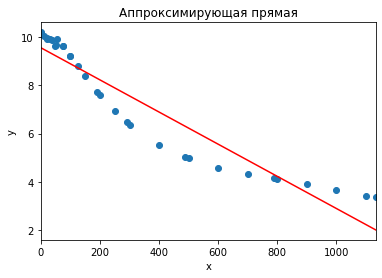

In [15]:
# Построим график
f = k*x + b
plt.scatter(x, y)
plt.plot(x, f, color = 'red')
plt.title("Аппроксимирующая прямая")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, x.max())
plt.show()

### Вывод
Метод наименьших квадратов (МНК) используется для аппроксимации данных, то есть для поиска зависимости между переменными. Этот метод используется для прогнозирования будущих значений и построения моделей, которые могут быть использованы для анализа данных и принятия решений. Он также может использоваться для обработки сигналов, оптимизации функций и других приложений в области математики, науки, инженерии и физики.

Нам удалось успешно посчитать и построить аппроксимирующую прямую с помощью МНК, используя библиотеки Python: pandas (для чтения и работы с табличными даннами), numpy (для работами с массивами) и matplotlib (для построения графиков). 

## Часть 2. Вычисление полинома Лагранжа

In [6]:
# Загружаем данные из Excel-файла
filename2 = 'part_2.xlsx'
data2 = pd.read_excel(filename2)
print(data2.head(10))

   Salinity  Pres
0     233.0     0
1     232.5     8
2     232.8    10
3     234.1    19
4     234.0    20
5       NaN    30
6     233.0    39
7     231.0    50
8     228.5    58
9     220.1    75


In [7]:
# Избавимся от строчек с неопределёнными значениями
data2 = data2.dropna()
data2 = data2.reset_index(drop=True)
print(data2.head(10))

   Salinity  Pres
0     233.0     0
1     232.5     8
2     232.8    10
3     234.1    19
4     234.0    20
5     233.0    39
6     231.0    50
7     228.5    58
8     220.1    75
9     218.6    78


In [8]:
# Превратим столбцы Pres и Salinity в отдельные массивы для вычислений и отрисовки на графике
# Будем считать, что Pres - это x, а Salinity - y. 
pr = data2['Pres']
sl = data2['Salinity']

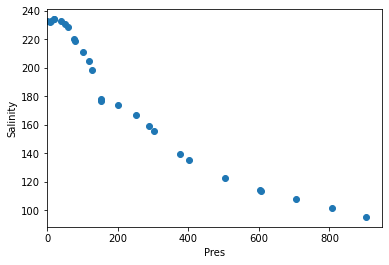

In [9]:
# Отобразим исходные точки на плоскости
plt.scatter(pr, sl)
plt.xlabel('Pres')
plt.ylabel('Salinity')
plt.xlim(0)
plt.show()

In [10]:
# Воспользуемся методом Лагранжа, предварительно построив полиномы Лагранжа
pr_new = np.linspace(pr.min(), pr.max(), 60)
q = len(pr)
m = len(pr_new)
sl_new = np.zeros(m)

for n in range(m):
    s = 0
    for i in range(q):
        p = 1
        for j in range(q):
            if i != j:
                p *= (pr_new[n] - pr[j]) / (pr[i] - pr[j])
        s += sl[i] * p
    sl_new[n] = s

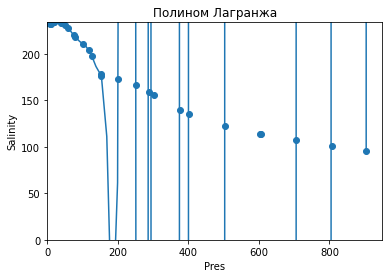

In [16]:
# Строим график
plt.scatter(pr, sl)
plt.plot(pr_new, sl_new)
plt.title('Полином Лагранжа')
plt.xlabel('Pres')
plt.ylabel('Salinity')
plt.xlim(0)
plt.ylim(0, sl.max())
plt.show()

### Вывод
Интерполяционный метод Лагранжа используется для приближения функции по набору известных значений в заданных точках. С помощью этого метода можно получить аналитическую формулу для функции, которая проходит через эти точки. Это позволяет упростить дальнейшие вычисления и прогнозирование значений функции в других точках, а также использовать полученную формулу для аппроксимации данных в дальнейшей работе. Интерполяционный метод Лагранжа широко применяется в математическом моделировании, научной и инженерной практике.

Нам удалось успешно провести интерполяцию с помощью метода Лагранжа, используя библиотеки Python: pandas (для чтения и работы с табличными даннами), numpy (для работами с массивами) и matplotlib (для построения графиков). 